# Analyse exploratoire complète des données (EDA)

**Auteur:** Louis Vanacker

**Date:** 7 janvier 2026

**Objectif:** Réaliser une analyse exploratoire complète du jeu de données Students Performance in Exams.

## Table des matières
1. [Chargement et aperçu des données](#1)
2. [Analyse univariée](#2)
3. [Analyse bivariée](#3)
4. [Analyse multivariée](#4)
5. [Feature Engineering](#5)
6. [Conclusions et insights](#6)

<a id='1'></a>
## 1. Chargement et aperçu des données

In [76]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration du style et de la langue française
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

print('Bibliothèques importées avec succès')

Bibliothèques importées avec succès


In [77]:
# Chargement des données
url = "https://raw.githubusercontent.com/Dorsumsellae/Programmation-avancee-Projet-d-examen-Students-Performance-in-Exams/main/data/raw/StudentsPerformance.csv"
df = pd.read_csv(url)

# Renommer les colonnes en français
df_fr = df.rename(columns={
    'gender': 'genre',
    'race/ethnicity': 'origine_ethnique',
    'parental level of education': 'niveau_education_parents',
    'lunch': 'dejeuner',
    'test preparation course': 'cours_preparation',
    'math score': 'score_maths',
    'reading score': 'score_lecture',
    'writing score': 'score_ecriture'
})

# Traduire les valeurs
df_fr['genre'] = df_fr['genre'].replace({'male': 'homme', 'female': 'femme'})
df_fr['dejeuner'] = df_fr['dejeuner'].replace({'standard': 'standard', 'free/reduced': 'gratuit/réduit'})
df_fr['cours_preparation'] = df_fr['cours_preparation'].replace({'completed': 'complété', 'none': 'aucun'})

# Traduire les niveaux d'éducation
education_fr = {
    "some high school": "lycée (partiel)",
    "high school": "lycée",
    "some college": "université (partiel)",
    "associate's degree": "diplôme associé",
    "bachelor's degree": "licence",
    "master's degree": "master"
}
df_fr['niveau_education_parents'] = df_fr['niveau_education_parents'].replace(education_fr)

print(f'Dataset chargé : {df_fr.shape[0]} lignes, {df_fr.shape[1]} colonnes')
print('\nAperçu des 5 premières lignes :')
df_fr.head()

Dataset chargé : 1000 lignes, 8 colonnes

Aperçu des 5 premières lignes :


,genre,origine_ethnique,niveau_education_parents,dejeuner,cours_preparation,score_maths,score_lecture,score_ecriture
0,femme,group B,licence,standard,aucun,72,72,74
1,femme,group C,université (partiel),standard,complété,69,90,88
2,femme,group B,master,standard,aucun,90,95,93
3,homme,group A,diplôme associé,gratuit/réduit,aucun,47,57,44
4,homme,group C,université (partiel),standard,aucun,76,78,75


In [78]:
# Informations sur le dataset
print('=== INFORMATIONS SUR LE DATASET ===')
df_fr.info()

print('\n=== STATISTIQUES DESCRIPTIVES ===')
df_fr.describe()

=== INFORMATIONS SUR LE DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   genre                     1000 non-null   object
 1   origine_ethnique          1000 non-null   object
 2   niveau_education_parents  1000 non-null   object
 3   dejeuner                  1000 non-null   object
 4   cours_preparation         1000 non-null   object
 5   score_maths               1000 non-null   int64 
 6   score_lecture             1000 non-null   int64 
 7   score_ecriture            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

=== STATISTIQUES DESCRIPTIVES ===


,score_maths,score_lecture,score_ecriture
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [79]:
# Vérification de la qualité des données
print('=== QUALITÉ DES DONNÉES ===')
print(f'\nValeurs manquantes : {df_fr.isnull().sum().sum()}')
print(f'Doublons : {df_fr.duplicated().sum()}')
print('\nTypes de données :')
print(df_fr.dtypes)
print('\nValeurs uniques par colonne :')
for col in df_fr.columns:
    print(f'  - {col}: {df_fr[col].nunique()} valeurs')

=== QUALITÉ DES DONNÉES ===

Valeurs manquantes : 0
Doublons : 0

Types de données :
genre                       object
origine_ethnique            object
niveau_education_parents    object
dejeuner                    object
cours_preparation           object
score_maths                  int64
score_lecture                int64
score_ecriture               int64
dtype: object

Valeurs uniques par colonne :
  - genre: 2 valeurs
  - origine_ethnique: 5 valeurs
  - niveau_education_parents: 6 valeurs
  - dejeuner: 2 valeurs
  - cours_preparation: 2 valeurs
  - score_maths: 81 valeurs
  - score_lecture: 72 valeurs
  - score_ecriture: 77 valeurs


<a id='2'></a>
## 2. Analyse univariée

### 2.1 Variables catégorielles

In [80]:
# Liste des variables
categorical_cols = ['genre', 'origine_ethnique', 'niveau_education_parents', 'dejeuner', 'cours_preparation']
score_cols = ['score_maths', 'score_lecture', 'score_ecriture']

print('=== ANALYSE DES VARIABLES CATÉGORIELLES ===')

for col in categorical_cols:
    print(f'\n{col.upper().replace("_", " ")}:')
    print(df_fr[col].value_counts())
    print(f'\nDistribution en % :')
    print(df_fr[col].value_counts(normalize=True).mul(100).round(1))

=== ANALYSE DES VARIABLES CATÉGORIELLES ===

GENRE:
genre
femme    518
homme    482
Name: count, dtype: int64

Distribution en % :
genre
femme    51.8
homme    48.2
Name: proportion, dtype: float64

ORIGINE ETHNIQUE:
origine_ethnique
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Distribution en % :
origine_ethnique
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64

NIVEAU EDUCATION PARENTS:
niveau_education_parents
université (partiel)    226
diplôme associé         222
lycée                   196
lycée (partiel)         179
licence                 118
master                   59
Name: count, dtype: int64

Distribution en % :
niveau_education_parents
université (partiel)    22.6
diplôme associé         22.2
lycée                   19.6
lycée (partiel)         17.9
licence                 11.8
master                   5.9
Name: proportion, dtype: float64

DEJEUNER:
deje

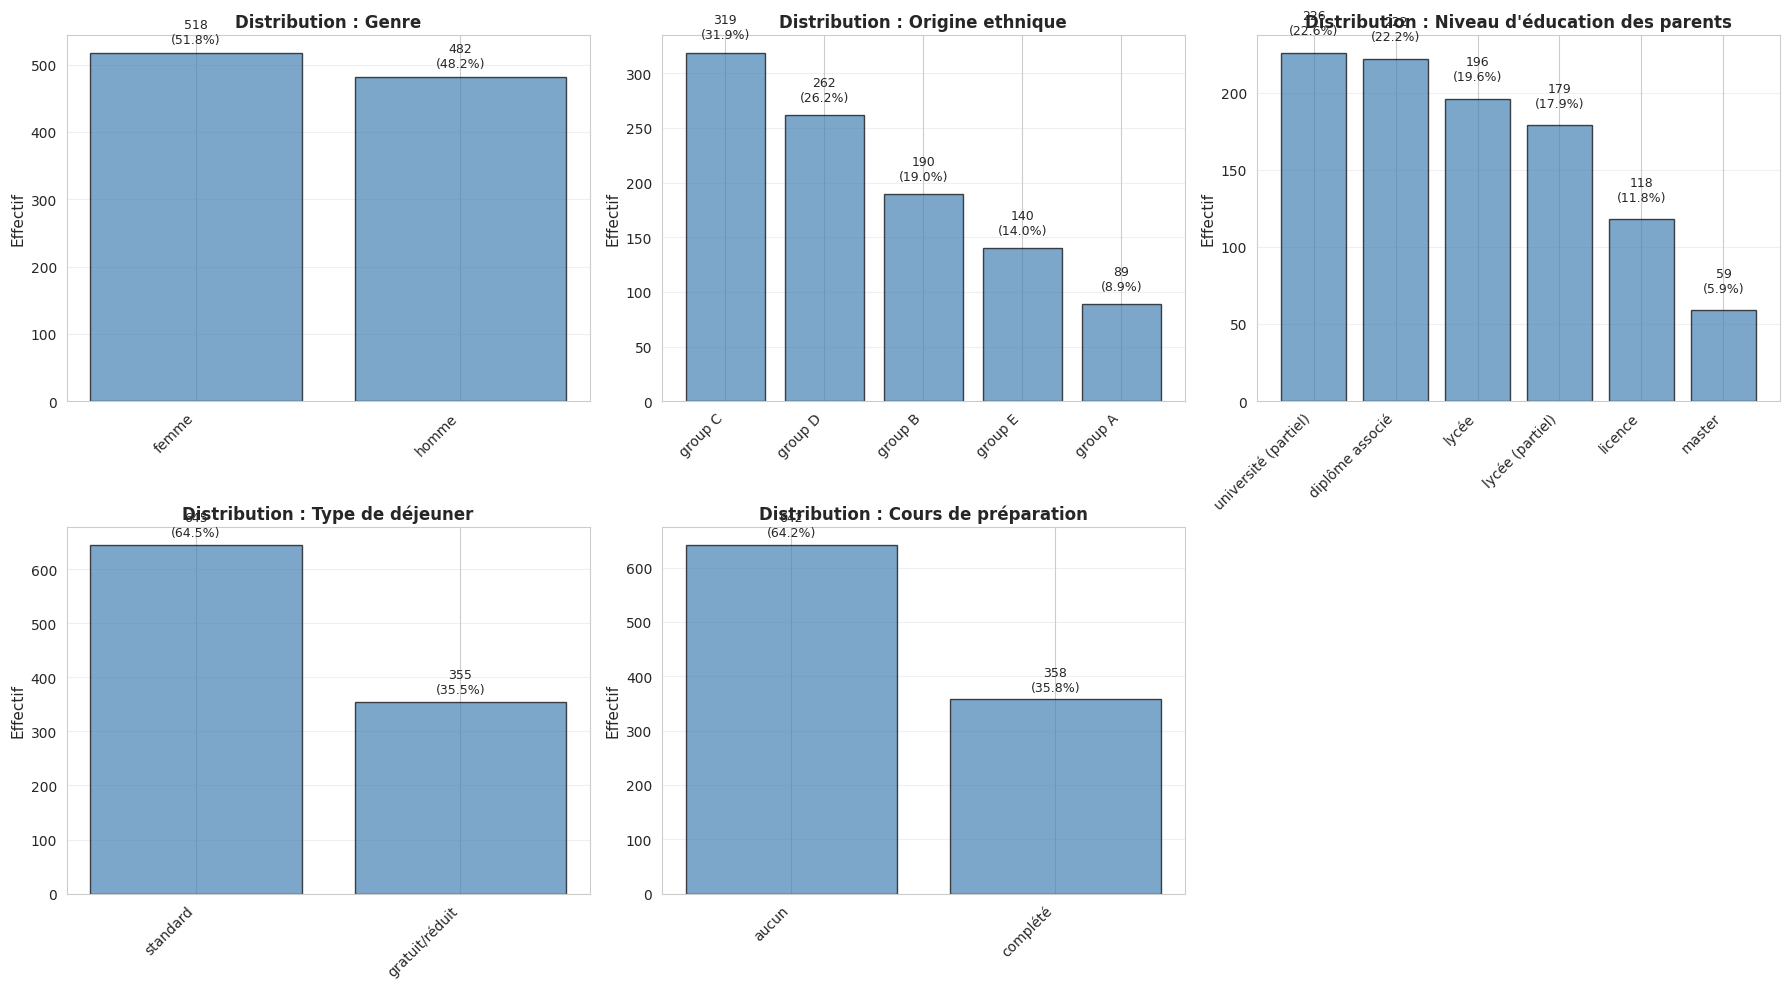

In [81]:
# Visualisation des variables catégorielles
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

labels_fr = {
    'genre': 'Genre',
    'origine_ethnique': 'Origine ethnique',
    'niveau_education_parents': 'Niveau d\'éducation des parents',
    'dejeuner': 'Type de déjeuner',
    'cours_preparation': 'Cours de préparation'
}

for i, col in enumerate(categorical_cols):
    counts = df_fr[col].value_counts()
    axes[i].bar(range(len(counts)), counts.values, color='steelblue', alpha=0.7, edgecolor='black')
    axes[i].set_xticks(range(len(counts)))
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_title(f'Distribution : {labels_fr[col]}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Effectif', fontsize=11)
    axes[i].grid(axis='y', alpha=0.3)

    for j, v in enumerate(counts.values):
        axes[i].text(j, v + 10, f'{v}\n({v/len(df_fr)*100:.1f}%)',
                    ha='center', va='bottom', fontsize=9)

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

### 2.2 Variables numériques (Scores)

In [82]:
print('=== STATISTIQUES DES SCORES ===')
print(df_fr[score_cols].describe())

print('\n=== STATISTIQUES DÉTAILLÉES PAR SCORE ===')

for col in score_cols:
    print(f'\n{col.upper().replace("_", " ")}:')
    print(f'  Moyenne     : {df_fr[col].mean():.2f}')
    print(f'  Médiane     : {df_fr[col].median():.2f}')
    print(f'  Mode        : {df_fr[col].mode()[0]}')
    print(f'  Écart-type  : {df_fr[col].std():.2f}')
    print(f'  Variance    : {df_fr[col].var():.2f}')
    print(f'  Asymétrie   : {df_fr[col].skew():.2f}')
    print(f'  Aplatissement: {df_fr[col].kurtosis():.2f}')
    print(f'  Minimum     : {df_fr[col].min()}')
    print(f'  Maximum     : {df_fr[col].max()}')
    print(f'  Étendue     : {df_fr[col].max() - df_fr[col].min()}')

=== STATISTIQUES DES SCORES ===
       score_maths  score_lecture  score_ecriture
count   1000.00000    1000.000000     1000.000000
mean      66.08900      69.169000       68.054000
std       15.16308      14.600192       15.195657
min        0.00000      17.000000       10.000000
25%       57.00000      59.000000       57.750000
50%       66.00000      70.000000       69.000000
75%       77.00000      79.000000       79.000000
max      100.00000     100.000000      100.000000

=== STATISTIQUES DÉTAILLÉES PAR SCORE ===

SCORE MATHS:
  Moyenne     : 66.09
  Médiane     : 66.00
  Mode        : 65
  Écart-type  : 15.16
  Variance    : 229.92
  Asymétrie   : -0.28
  Aplatissement: 0.27
  Minimum     : 0
  Maximum     : 100
  Étendue     : 100

SCORE LECTURE:
  Moyenne     : 69.17
  Médiane     : 70.00
  Mode        : 72
  Écart-type  : 14.60
  Variance    : 213.17
  Asymétrie   : -0.26
  Aplatissement: -0.07
  Minimum     : 17
  Maximum     : 100
  Étendue     : 83

SCORE ECRITURE:
  Moyen

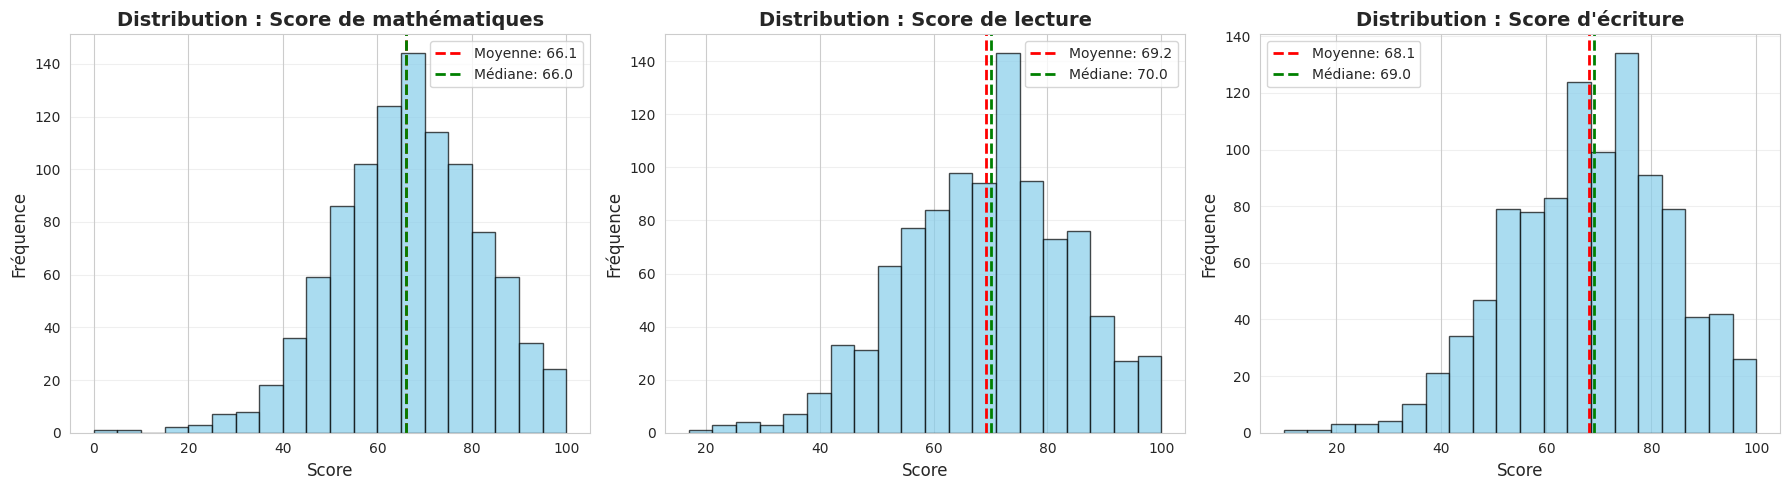

In [83]:
# Distributions des scores avec statistiques
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

titles = ['Score de mathématiques', 'Score de lecture', 'Score d\'écriture']

for i, col in enumerate(score_cols):
    axes[i].hist(df_fr[col], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
    axes[i].axvline(df_fr[col].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Moyenne: {df_fr[col].mean():.1f}')
    axes[i].axvline(df_fr[col].median(), color='green', linestyle='--', linewidth=2,
                   label=f'Médiane: {df_fr[col].median():.1f}')
    axes[i].set_title(f'Distribution : {titles[i]}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Score', fontsize=12)
    axes[i].set_ylabel('Fréquence', fontsize=12)
    axes[i].legend(fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

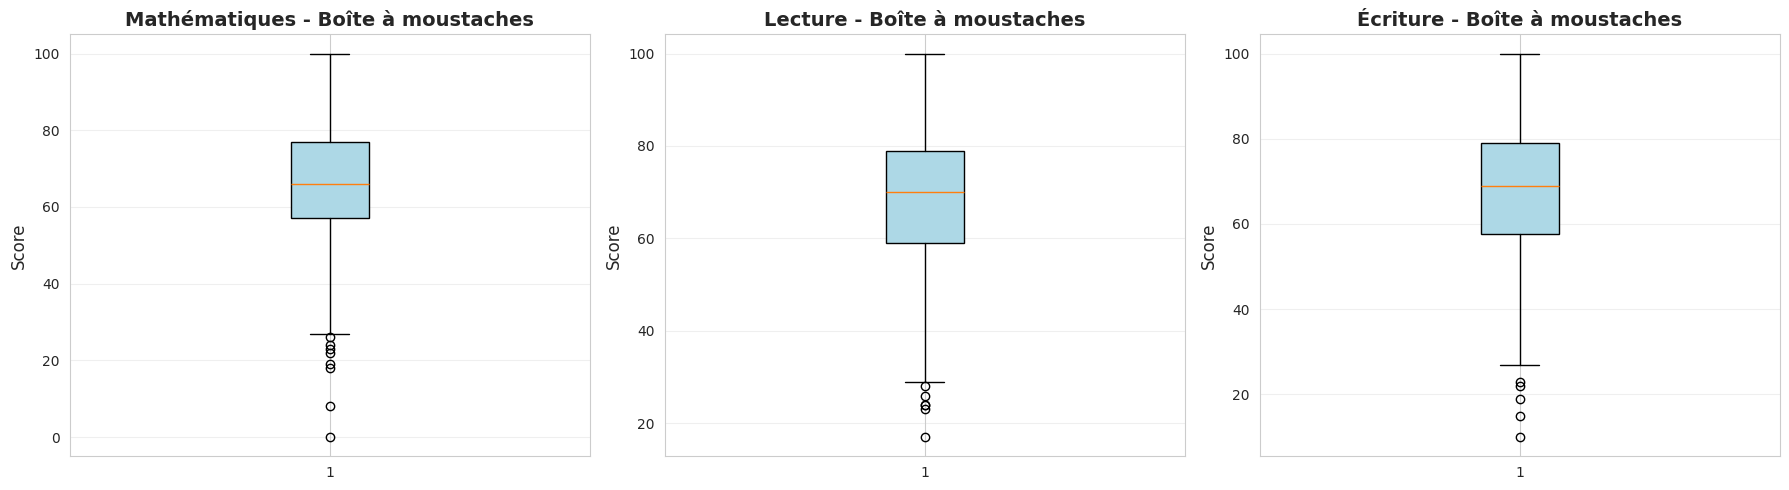

In [84]:
# Boxplots pour détecter les outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

titles = ['Mathématiques', 'Lecture', 'Écriture']

for i, col in enumerate(score_cols):
    bp = axes[i].boxplot(df_fr[col], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_edgecolor('black')
    axes[i].set_title(f'{titles[i]} - Boîte à moustaches', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Score', fontsize=12)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [85]:
# Détection des valeurs aberrantes (méthode IQR)
print('=== DÉTECTION DES VALEURS ABERRANTES (MÉTHODE IQR) ===')

titles = ['SCORE MATHÉMATIQUES', 'SCORE LECTURE', 'SCORE ÉCRITURE']

for i, col in enumerate(score_cols):
    Q1 = df_fr[col].quantile(0.25)
    Q3 = df_fr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_fr[(df_fr[col] < lower_bound) | (df_fr[col] > upper_bound)]

    print(f'\n{titles[i]}:')
    print(f'  Q1 (25%)            : {Q1:.2f}')
    print(f'  Q3 (75%)            : {Q3:.2f}')
    print(f'  IQR                 : {IQR:.2f}')
    print(f'  Borne inférieure    : {lower_bound:.2f}')
    print(f'  Borne supérieure    : {upper_bound:.2f}')
    print(f'  Valeurs aberrantes  : {len(outliers)} ({len(outliers)/len(df_fr)*100:.2f}%)')

=== DÉTECTION DES VALEURS ABERRANTES (MÉTHODE IQR) ===

SCORE MATHÉMATIQUES:
  Q1 (25%)            : 57.00
  Q3 (75%)            : 77.00
  IQR                 : 20.00
  Borne inférieure    : 27.00
  Borne supérieure    : 107.00
  Valeurs aberrantes  : 8 (0.80%)

SCORE LECTURE:
  Q1 (25%)            : 59.00
  Q3 (75%)            : 79.00
  IQR                 : 20.00
  Borne inférieure    : 29.00
  Borne supérieure    : 109.00
  Valeurs aberrantes  : 6 (0.60%)

SCORE ÉCRITURE:
  Q1 (25%)            : 57.75
  Q3 (75%)            : 79.00
  IQR                 : 21.25
  Borne inférieure    : 25.88
  Borne supérieure    : 110.88
  Valeurs aberrantes  : 5 (0.50%)


<a id='3'></a>
## 3. Analyse bivariée

### 3.1 Corrélations entre les scores

=== MATRICE DE CORRÉLATION ENTRE LES SCORES ===
             Maths   Lecture  Écriture
Maths     1.000000  0.817580  0.802642
Lecture   0.817580  1.000000  0.954598
Écriture  0.802642  0.954598  1.000000


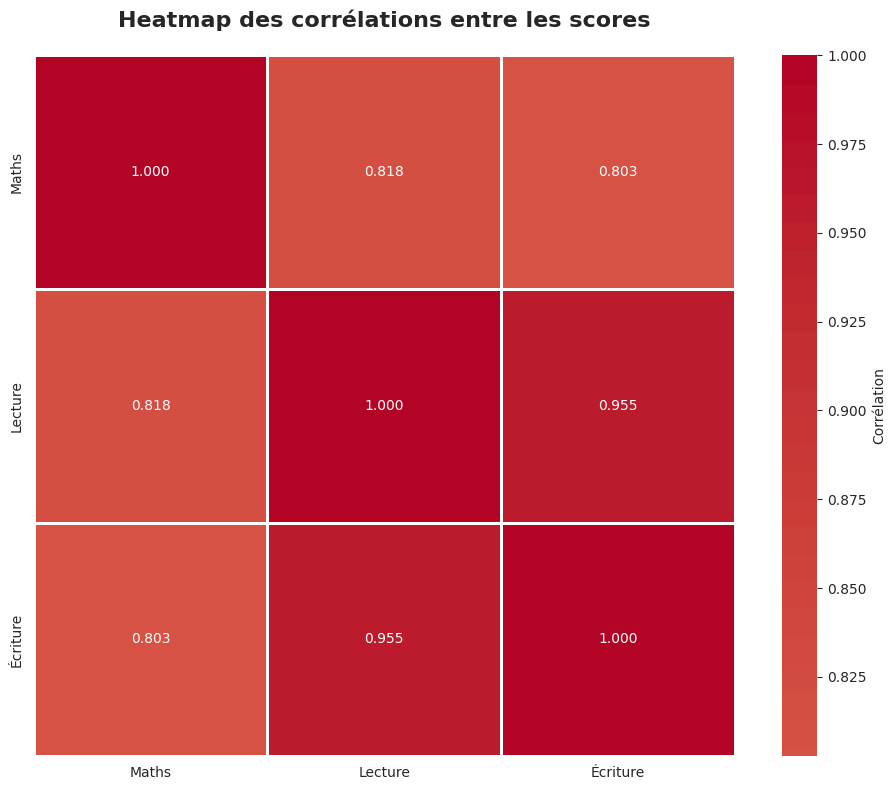

In [86]:
# Matrice de corrélation
correlation_matrix = df_fr[score_cols].corr()

# Renommer pour l'affichage
correlation_matrix.index = ['Maths', 'Lecture', 'Écriture']
correlation_matrix.columns = ['Maths', 'Lecture', 'Écriture']

print('=== MATRICE DE CORRÉLATION ENTRE LES SCORES ===')
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.3f', square=True, linewidths=1, cbar_kws={'label': 'Corrélation'})
plt.title('Heatmap des corrélations entre les scores', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

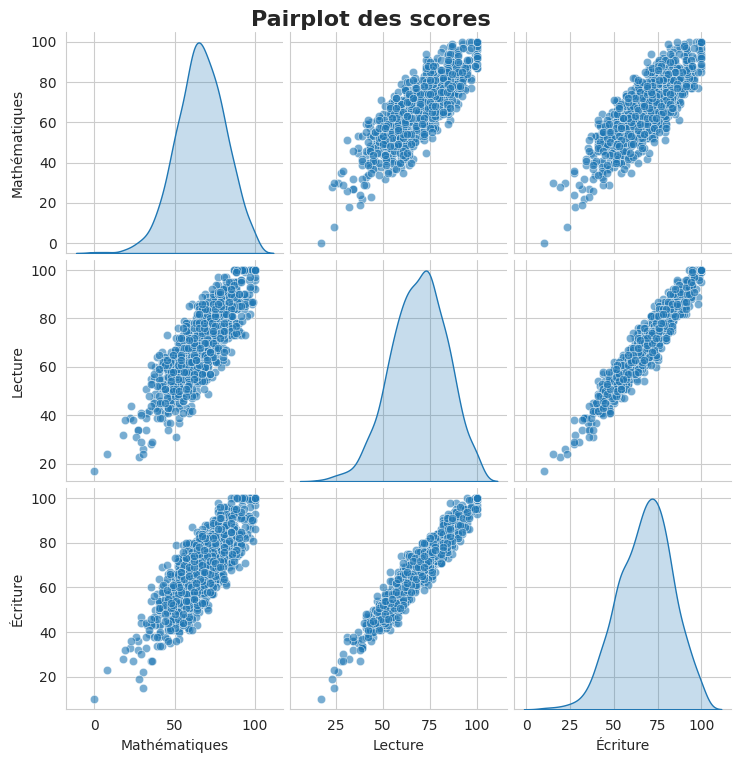

In [87]:
# Pairplot des scores
df_pairplot = df_fr[score_cols].copy()
df_pairplot.columns = ['Mathématiques', 'Lecture', 'Écriture']
sns.pairplot(df_pairplot, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot des scores', fontsize=16, fontweight='bold', y=1.01)
plt.show()

### 3.2 Impact du genre sur les scores

In [88]:
# Statistiques par genre
print('=== SCORES MOYENS PAR GENRE ===')
genre_stats = df_fr.groupby('genre')[score_cols].mean()
genre_stats.columns = ['Mathématiques', 'Lecture', 'Écriture']
print(genre_stats)

print('\n=== ÉCART-TYPE PAR GENRE ===')
genre_std = df_fr.groupby('genre')[score_cols].std()
genre_std.columns = ['Mathématiques', 'Lecture', 'Écriture']
print(genre_std)

=== SCORES MOYENS PAR GENRE ===
       Mathématiques    Lecture   Écriture
genre                                     
femme      63.633205  72.608108  72.467181
homme      68.728216  65.473029  63.311203

=== ÉCART-TYPE PAR GENRE ===
       Mathématiques    Lecture   Écriture
genre                                     
femme      15.491453  14.378245  14.844842
homme      14.356277  13.931832  14.113832


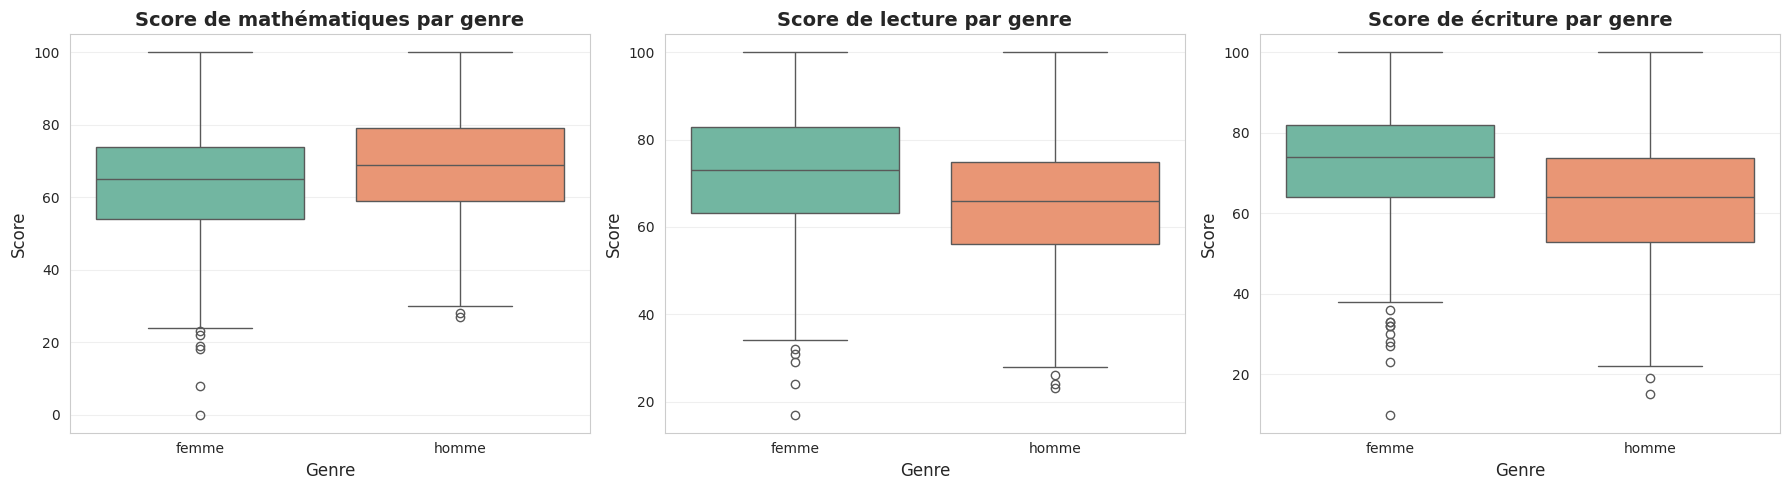

In [89]:
# Visualisation par genre
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Mathématiques', 'Lecture', 'Écriture']

for i, col in enumerate(score_cols):
    sns.boxplot(data=df_fr, x='genre', y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Score de {titles[i].lower()} par genre', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Genre', fontsize=12)
    axes[i].set_ylabel('Score', fontsize=12)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 3.3 Impact du niveau d'éducation des parents

In [90]:
# Statistiques par niveau d'éducation
print('=== SCORES MOYENS PAR NIVEAU D\'ÉDUCATION DES PARENTS ===')
edu_stats = df_fr.groupby('niveau_education_parents')[score_cols].mean().round(2)
edu_stats.columns = ['Mathématiques', 'Lecture', 'Écriture']
print(edu_stats)

=== SCORES MOYENS PAR NIVEAU D'ÉDUCATION DES PARENTS ===
                          Mathématiques  Lecture  Écriture
niveau_education_parents                                  
diplôme associé                   67.88    70.93     69.90
licence                           69.39    73.00     73.38
lycée                             62.14    64.70     62.45
lycée (partiel)                   63.50    66.94     64.89
master                            69.75    75.37     75.68
université (partiel)              67.13    69.46     68.84


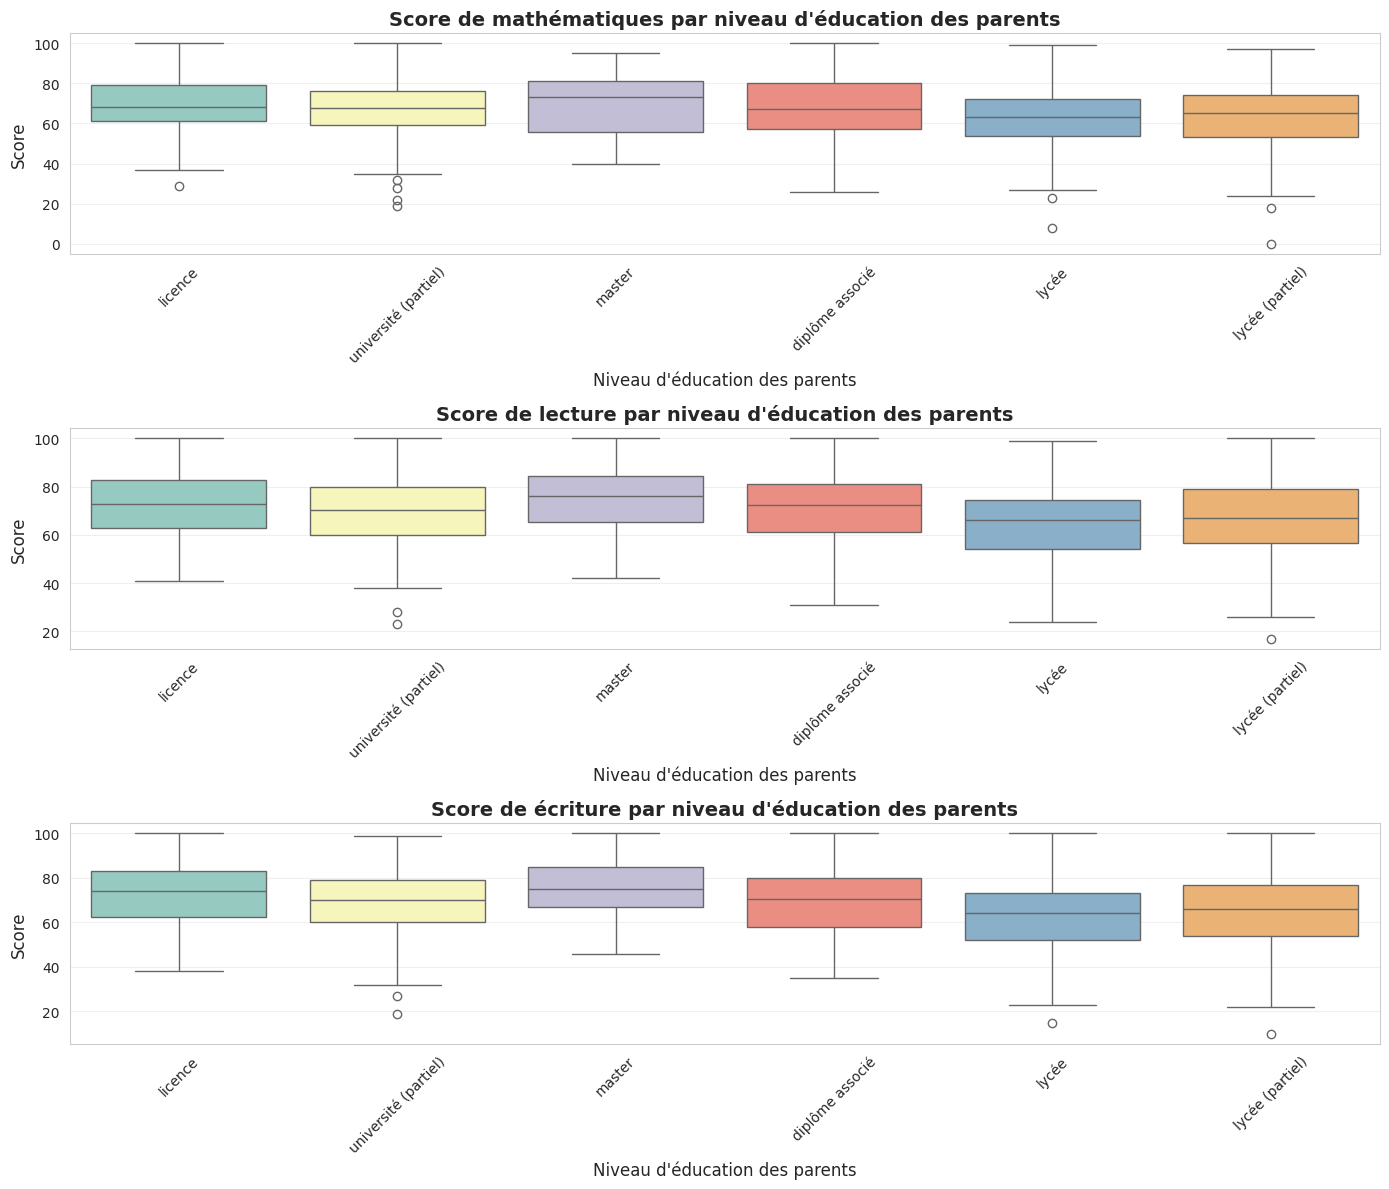

In [91]:
# Visualisation
fig, axes = plt.subplots(3, 1, figsize=(14, 12))
titles = ['Mathématiques', 'Lecture', 'Écriture']

for i, col in enumerate(score_cols):
    sns.boxplot(data=df_fr, x='niveau_education_parents', y=col, ax=axes[i], palette='Set3')
    axes[i].set_title(f'Score de {titles[i].lower()} par niveau d\'éducation des parents',
                     fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Niveau d\'éducation des parents', fontsize=12)
    axes[i].set_ylabel('Score', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 3.4 Impact du type de déjeuner

In [92]:
# Statistiques par type de déjeuner
print('=== SCORES MOYENS PAR TYPE DE DÉJEUNER ===')
lunch_stats = df_fr.groupby('dejeuner')[score_cols].mean()
lunch_stats.columns = ['Mathématiques', 'Lecture', 'Écriture']
print(lunch_stats)

print('\n=== DIFFÉRENCE ENTRE STANDARD ET GRATUIT/RÉDUIT ===')
for i, col in enumerate(score_cols):
    diff = df_fr[df_fr['dejeuner']=='standard'][col].mean() - df_fr[df_fr['dejeuner']=='gratuit/réduit'][col].mean()
    print(f'{titles[i]}: {diff:.2f} points')

=== SCORES MOYENS PAR TYPE DE DÉJEUNER ===
                Mathématiques    Lecture   Écriture
dejeuner                                           
gratuit/réduit      58.921127  64.653521  63.022535
standard            70.034109  71.654264  70.823256

=== DIFFÉRENCE ENTRE STANDARD ET GRATUIT/RÉDUIT ===
Mathématiques: 11.11 points
Lecture: 7.00 points
Écriture: 7.80 points


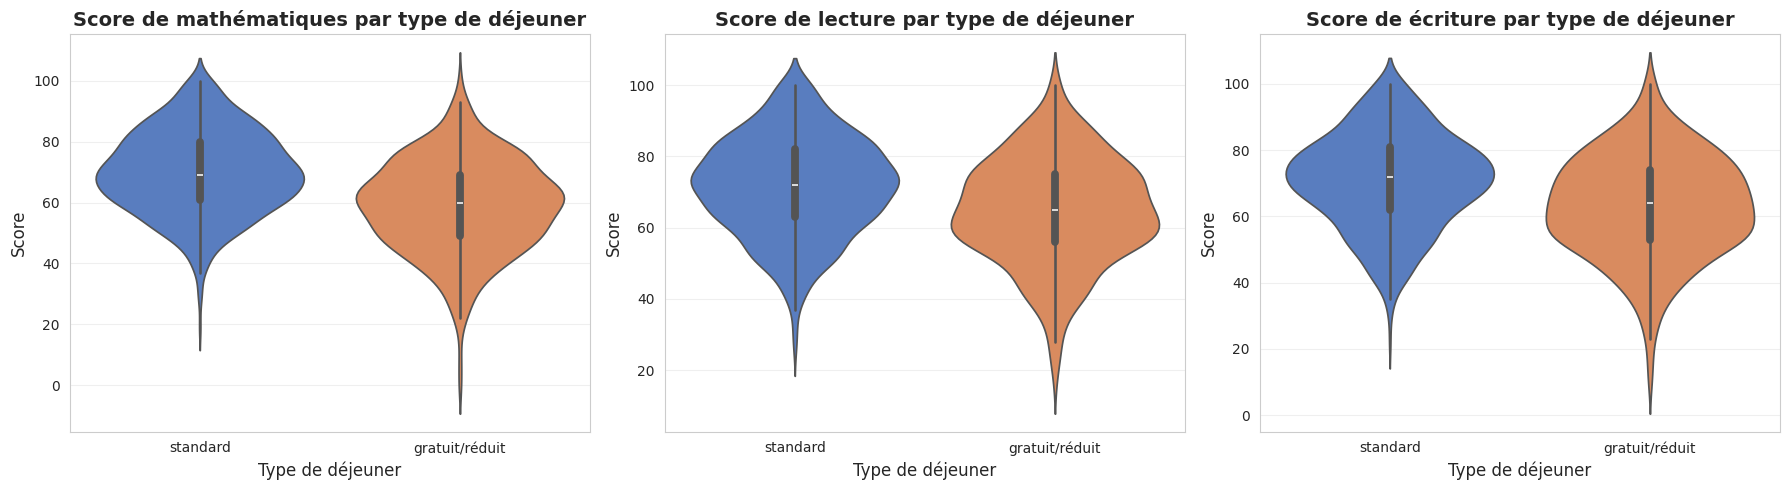

In [93]:
# Visualisation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Mathématiques', 'Lecture', 'Écriture']

for i, col in enumerate(score_cols):
    sns.violinplot(data=df_fr, x='dejeuner', y=col, ax=axes[i], palette='muted')
    axes[i].set_title(f'Score de {titles[i].lower()} par type de déjeuner', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Type de déjeuner', fontsize=12)
    axes[i].set_ylabel('Score', fontsize=12)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 3.5 Impact du cours de préparation aux tests

In [94]:
# Statistiques par préparation
print('=== SCORES MOYENS PAR COURS DE PRÉPARATION ===')
prep_stats = df_fr.groupby('cours_preparation')[score_cols].mean()
prep_stats.columns = ['Mathématiques', 'Lecture', 'Écriture']
print(prep_stats)

print('\n=== GAIN MOYEN AVEC LE COURS DE PRÉPARATION ===')
titles = ['Mathématiques', 'Lecture', 'Écriture']
for i, col in enumerate(score_cols):
    gain = df_fr[df_fr['cours_preparation']=='complété'][col].mean() - df_fr[df_fr['cours_preparation']=='aucun'][col].mean()
    print(f'{titles[i]}: +{gain:.2f} points')

=== SCORES MOYENS PAR COURS DE PRÉPARATION ===
                   Mathématiques    Lecture   Écriture
cours_preparation                                     
aucun                  64.077882  66.534268  64.504673
complété               69.695531  73.893855  74.418994

=== GAIN MOYEN AVEC LE COURS DE PRÉPARATION ===
Mathématiques: +5.62 points
Lecture: +7.36 points
Écriture: +9.91 points


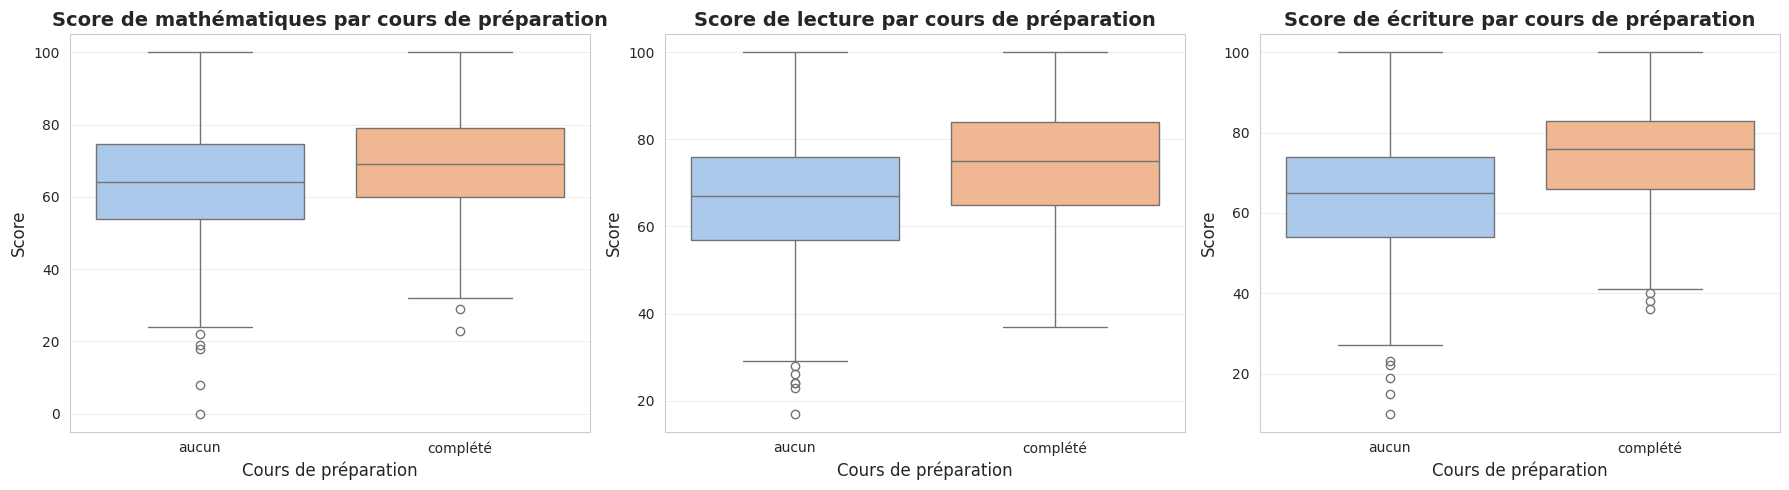

In [95]:
# Visualisation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Mathématiques', 'Lecture', 'Écriture']

for i, col in enumerate(score_cols):
    sns.boxplot(data=df_fr, x='cours_preparation', y=col, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Score de {titles[i].lower()} par cours de préparation', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Cours de préparation', fontsize=12)
    axes[i].set_ylabel('Score', fontsize=12)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 3.6 Impact de l'origine ethnique

In [96]:
# Statistiques par groupe ethnique
print('=== SCORES MOYENS PAR GROUPE ETHNIQUE ===')
eth_stats = df_fr.groupby('origine_ethnique')[score_cols].mean().round(2)
eth_stats.columns = ['Mathématiques', 'Lecture', 'Écriture']
print(eth_stats)

=== SCORES MOYENS PAR GROUPE ETHNIQUE ===
                  Mathématiques  Lecture  Écriture
origine_ethnique                                  
group A                   61.63    64.67     62.67
group B                   63.45    67.35     65.60
group C                   64.46    69.10     67.83
group D                   67.36    70.03     70.15
group E                   73.82    73.03     71.41


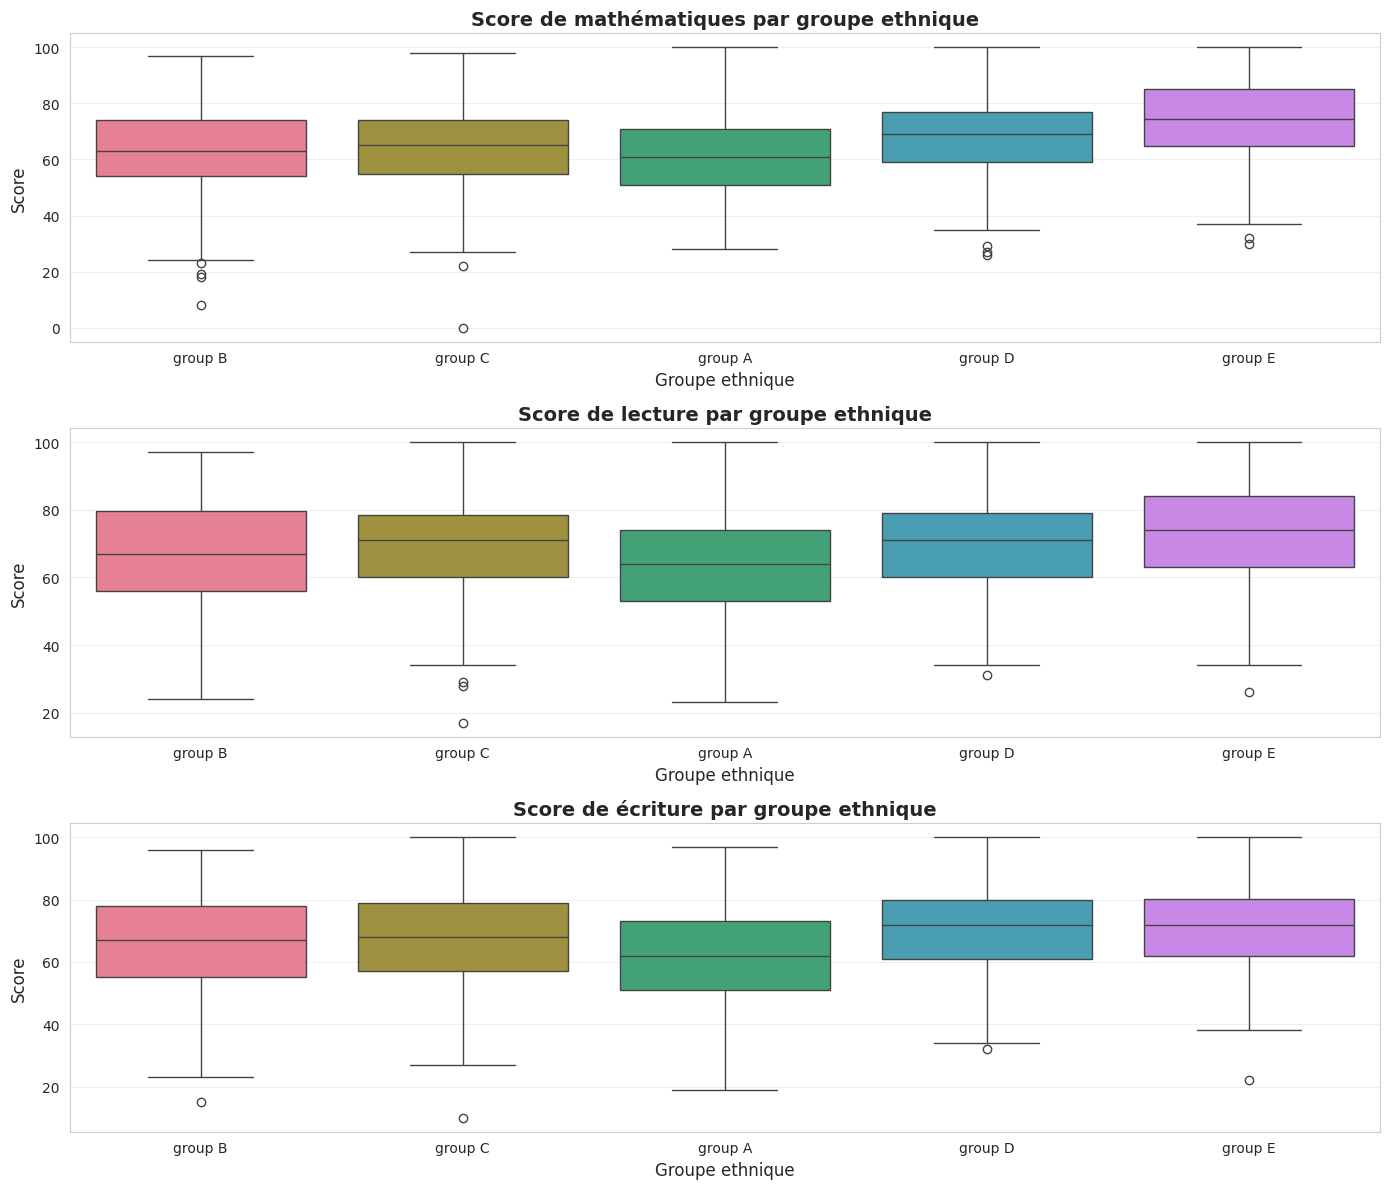

In [97]:
# Visualisation
fig, axes = plt.subplots(3, 1, figsize=(14, 12))
titles = ['Mathématiques', 'Lecture', 'Écriture']

for i, col in enumerate(score_cols):
    sns.boxplot(data=df_fr, x='origine_ethnique', y=col, ax=axes[i], palette='husl')
    axes[i].set_title(f'Score de {titles[i].lower()} par groupe ethnique', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Groupe ethnique', fontsize=12)
    axes[i].set_ylabel('Score', fontsize=12)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<a id='4'></a>
## 4. Analyse multivariée

In [98]:
# Analyse combinée : Genre + Cours de préparation
print('=== IMPACT COMBINÉ : GENRE + COURS DE PRÉPARATION ===')
combined_stats = df_fr.groupby(['genre', 'cours_preparation'])[score_cols].mean().round(2)
combined_stats.columns = ['Mathématiques', 'Lecture', 'Écriture']
print(combined_stats)

=== IMPACT COMBINÉ : GENRE + COURS DE PRÉPARATION ===
                         Mathématiques  Lecture  Écriture
genre cours_preparation                                  
femme aucun                      61.67    69.98     68.98
      complété                   67.20    77.38     78.79
homme aucun                      66.69    62.80     59.65
      complété                   72.34    70.21     69.79


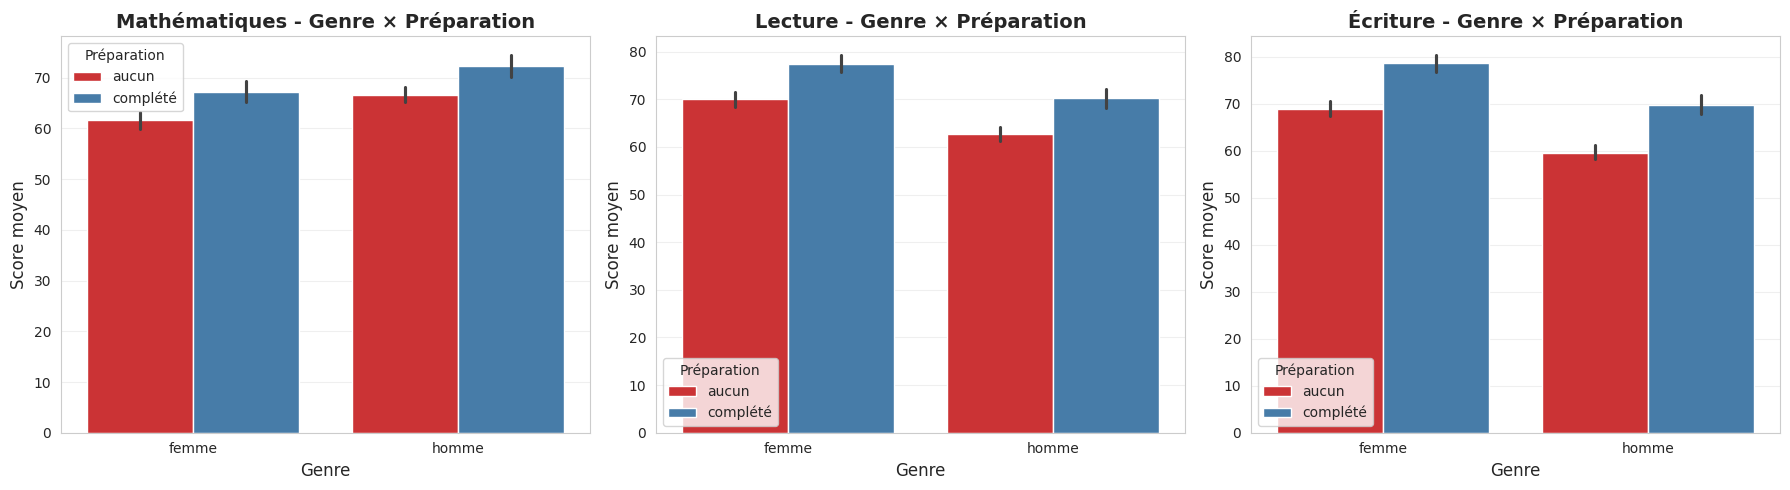

In [99]:
# Visualisation combinée
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Mathématiques', 'Lecture', 'Écriture']

for i, col in enumerate(score_cols):
    sns.barplot(data=df_fr, x='genre', y=col, hue='cours_preparation', ax=axes[i], palette='Set1')
    axes[i].set_title(f'{titles[i]} - Genre × Préparation', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Genre', fontsize=12)
    axes[i].set_ylabel('Score moyen', fontsize=12)
    axes[i].legend(title='Préparation')
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [100]:
# Analyse combinée : Déjeuner + Cours de préparation
print('=== IMPACT COMBINÉ : TYPE DE DÉJEUNER + COURS DE PRÉPARATION ===')
combined_lunch = df_fr.groupby(['dejeuner', 'cours_preparation'])[score_cols].mean().round(2)
combined_lunch.columns = ['Mathématiques', 'Lecture', 'Écriture']
print(combined_lunch)

=== IMPACT COMBINÉ : TYPE DE DÉJEUNER + COURS DE PRÉPARATION ===
                                  Mathématiques  Lecture  Écriture
dejeuner       cours_preparation                                  
gratuit/réduit aucun                      56.51    61.60     58.74
               complété                   63.05    69.87     70.35
standard       aucun                      68.13    69.18     67.60
               complété                   73.53    76.22     76.77


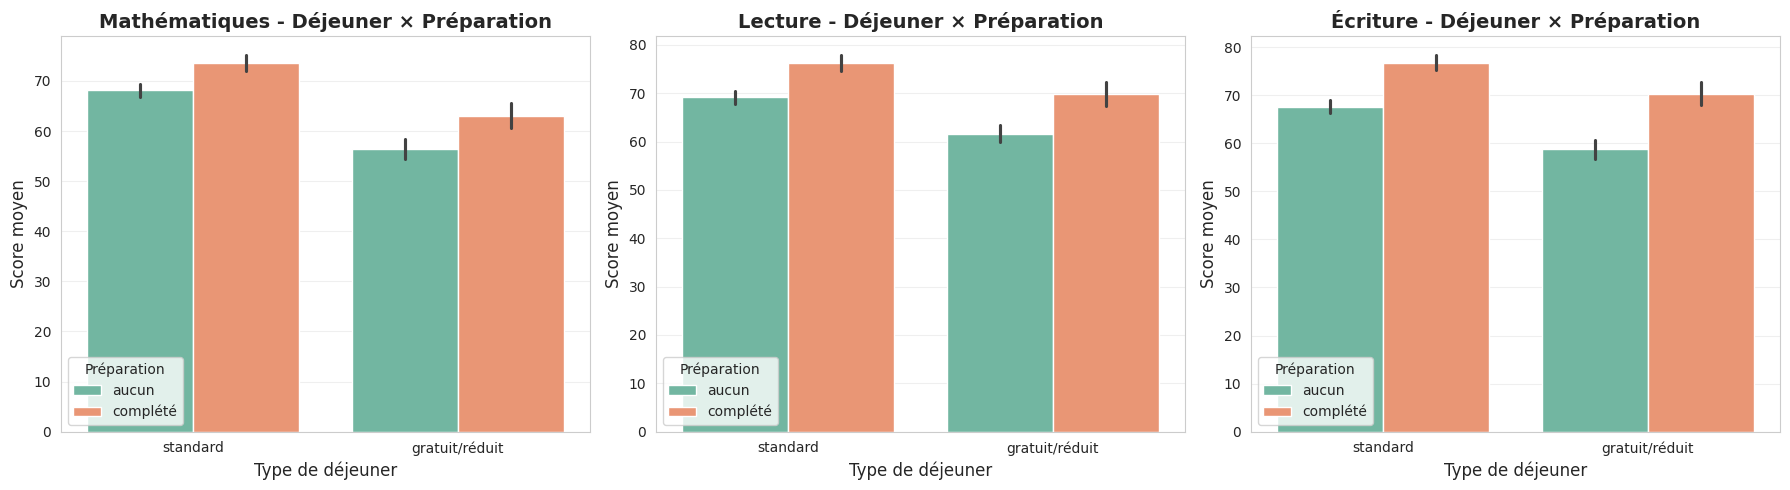

In [101]:
# Visualisation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Mathématiques', 'Lecture', 'Écriture']

for i, col in enumerate(score_cols):
    sns.barplot(data=df_fr, x='dejeuner', y=col, hue='cours_preparation', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{titles[i]} - Déjeuner × Préparation', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Type de déjeuner', fontsize=12)
    axes[i].set_ylabel('Score moyen', fontsize=12)
    axes[i].legend(title='Préparation')
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<a id='5'></a>
## 5. Feature Engineering

In [102]:
# Création de nouvelles features
df_fr['score_total'] = df_fr['score_maths'] + df_fr['score_lecture'] + df_fr['score_ecriture']
df_fr['score_moyen'] = df_fr['score_total'] / 3

# Catégories de performance
def categoriser_performance(score):
    if score >= 80:
        return 'Excellent'
    elif score >= 70:
        return 'Bien'
    elif score >= 60:
        return 'Moyen'
    elif score >= 50:
        return 'Passable'
    else:
        return 'Faible'

df_fr['categorie_performance'] = df_fr['score_moyen'].apply(categoriser_performance)

# Meilleure matière
def meilleure_matiere(row):
    scores = {'mathématiques': row['score_maths'], 'lecture': row['score_lecture'], 'écriture': row['score_ecriture']}
    return max(scores, key=scores.get)

df_fr['meilleure_matiere'] = df_fr.apply(meilleure_matiere, axis=1)

# Matière la plus faible
def matiere_faible(row):
    scores = {'mathématiques': row['score_maths'], 'lecture': row['score_lecture'], 'écriture': row['score_ecriture']}
    return min(scores, key=scores.get)

df_fr['matiere_faible'] = df_fr.apply(matiere_faible, axis=1)

print('Nouvelles features créées :')
print('  - score_total')
print('  - score_moyen')
print('  - categorie_performance')
print('  - meilleure_matiere')
print('  - matiere_faible')
print('\nAperçu des nouvelles colonnes :')
df_fr[['score_total', 'score_moyen', 'categorie_performance', 'meilleure_matiere', 'matiere_faible']].head(10)

Nouvelles features créées :
  - score_total
  - score_moyen
  - categorie_performance
  - meilleure_matiere
  - matiere_faible

Aperçu des nouvelles colonnes :


,score_total,score_moyen,categorie_performance,meilleure_matiere,matiere_faible
0,218,72.666667,Bien,écriture,mathématiques
1,247,82.333333,Excellent,lecture,mathématiques
2,278,92.666667,Excellent,lecture,mathématiques
3,148,49.333333,Faible,lecture,écriture
4,229,76.333333,Bien,lecture,écriture
5,232,77.333333,Bien,lecture,mathématiques
6,275,91.666667,Excellent,lecture,mathématiques
7,122,40.666667,Faible,lecture,écriture
8,195,65.000000,Moyen,écriture,mathématiques
9,148,49.333333,Faible,lecture,mathématiques


In [103]:
# Distribution des catégories de performance
print('=== DISTRIBUTION DES CATÉGORIES DE PERFORMANCE ===')
print(df_fr['categorie_performance'].value_counts())
print('\nEn pourcentage :')
print(df_fr['categorie_performance'].value_counts(normalize=True).mul(100).round(1))

=== DISTRIBUTION DES CATÉGORIES DE PERFORMANCE ===
categorie_performance
Bien         261
Moyen        256
Excellent    198
Passable     182
Faible       103
Name: count, dtype: int64

En pourcentage :
categorie_performance
Bien         26.1
Moyen        25.6
Excellent    19.8
Passable     18.2
Faible       10.3
Name: proportion, dtype: float64


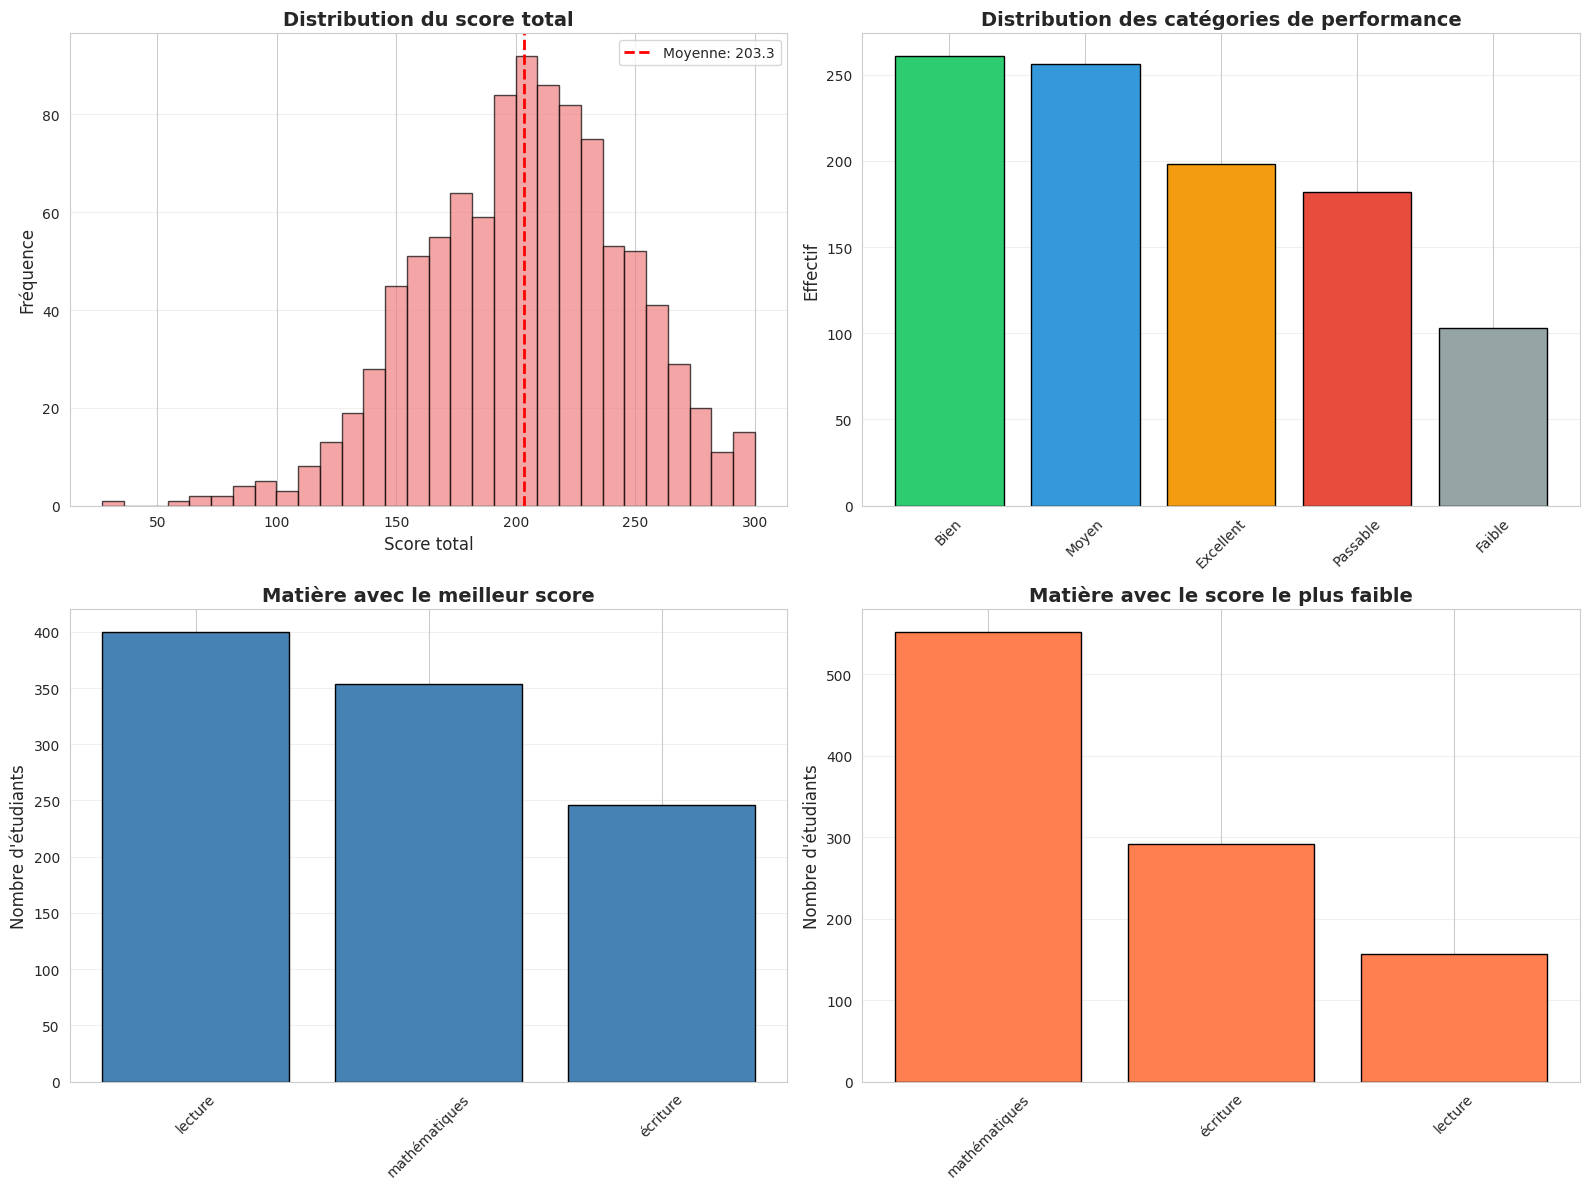

In [104]:
# Visualisation des nouvelles features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Score total
axes[0, 0].hist(df_fr['score_total'], bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
axes[0, 0].axvline(df_fr['score_total'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Moyenne: {df_fr["score_total"].mean():.1f}')
axes[0, 0].set_title('Distribution du score total', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Score total', fontsize=12)
axes[0, 0].set_ylabel('Fréquence', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Catégories de performance
perf_counts = df_fr['categorie_performance'].value_counts()
colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#95a5a6']
axes[0, 1].bar(range(len(perf_counts)), perf_counts.values, color=colors, edgecolor='black')
axes[0, 1].set_xticks(range(len(perf_counts)))
axes[0, 1].set_xticklabels(perf_counts.index, rotation=45)
axes[0, 1].set_title('Distribution des catégories de performance', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Effectif', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)

# Meilleure matière
best_counts = df_fr['meilleure_matiere'].value_counts()
axes[1, 0].bar(range(len(best_counts)), best_counts.values, color='steelblue', edgecolor='black')
axes[1, 0].set_xticks(range(len(best_counts)))
axes[1, 0].set_xticklabels(best_counts.index, rotation=45)
axes[1, 0].set_title('Matière avec le meilleur score', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Nombre d\'étudiants', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

# Matière la plus faible
worst_counts = df_fr['matiere_faible'].value_counts()
axes[1, 1].bar(range(len(worst_counts)), worst_counts.values, color='coral', edgecolor='black')
axes[1, 1].set_xticks(range(len(worst_counts)))
axes[1, 1].set_xticklabels(worst_counts.index, rotation=45)
axes[1, 1].set_title('Matière avec le score le plus faible', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Nombre d\'étudiants', fontsize=12)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<a id='6'></a>
## 6. Conclusions et insights

### 6.1 Résumé des découvertes principales

In [105]:
print('='*80)
print('RÉSUMÉ EXÉCUTIF - INSIGHTS CLÉS')
print('='*80)

print('\n1. QUALITÉ DES DONNÉES')
print(f'   • Dataset propre : {df_fr.isnull().sum().sum()} valeurs manquantes, {df_fr.duplicated().sum()} doublons')
print(f'   • {len(df_fr)} étudiants, {len(categorical_cols)} variables catégorielles, {len(score_cols)} scores')

print('\n2. SCORES MOYENS')
print(f'   • Mathématiques: {df_fr["score_maths"].mean():.2f} ± {df_fr["score_maths"].std():.2f}')
print(f'   • Lecture: {df_fr["score_lecture"].mean():.2f} ± {df_fr["score_lecture"].std():.2f}')
print(f'   • Écriture: {df_fr["score_ecriture"].mean():.2f} ± {df_fr["score_ecriture"].std():.2f}')
print(f'   • Les mathématiques sont la matière la plus faible en moyenne')

print('\n3. IMPACT DU GENRE')
print(f'   • Femmes meilleures en lecture/écriture')
print(f'   • Hommes légèrement meilleurs en mathématiques')
female_math = df_fr[df_fr['genre']=='femme']['score_maths'].mean()
male_math = df_fr[df_fr['genre']=='homme']['score_maths'].mean()
print(f'   • Écart mathématiques: {abs(male_math - female_math):.2f} points')

print('\n4. IMPACT DE L\'ÉDUCATION PARENTALE')
edu_impact = df_fr.groupby('niveau_education_parents')['score_moyen'].mean()
print(f'   • Meilleur niveau: {edu_impact.idxmax()} ({edu_impact.max():.2f})')
print(f'   • Niveau le plus bas: {edu_impact.idxmin()} ({edu_impact.min():.2f})')
print(f'   • Différence: {edu_impact.max() - edu_impact.min():.2f} points')

print('\n5. IMPACT DU TYPE DE DÉJEUNER')
standard_avg = df_fr[df_fr['dejeuner']=='standard']['score_moyen'].mean()
reduced_avg = df_fr[df_fr['dejeuner']=='gratuit/réduit']['score_moyen'].mean()
print(f'   • Standard: {standard_avg:.2f}')
print(f'   • Gratuit/Réduit: {reduced_avg:.2f}')
print(f'   • Différence: {standard_avg - reduced_avg:.2f} points')
print(f'   • Indicateur socio-économique fort')

print('\n6. IMPACT DU COURS DE PRÉPARATION')
prep_yes = df_fr[df_fr['cours_preparation']=='complété']['score_moyen'].mean()
prep_no = df_fr[df_fr['cours_preparation']=='aucun']['score_moyen'].mean()
print(f'   • Avec préparation: {prep_yes:.2f}')
print(f'   • Sans préparation: {prep_no:.2f}')
print(f'   • Gain moyen: +{prep_yes - prep_no:.2f} points')

print('\n7. CORRÉLATIONS')
print(f'   • Maths-Lecture: {df_fr["score_maths"].corr(df_fr["score_lecture"]):.3f}')
print(f'   • Maths-Écriture: {df_fr["score_maths"].corr(df_fr["score_ecriture"]):.3f}')
print(f'   • Lecture-Écriture: {df_fr["score_lecture"].corr(df_fr["score_ecriture"]):.3f}')
print(f'   • Lecture et Écriture très corrélés')

print('\n8. PERFORMANCE GLOBALE')
print(df_fr['categorie_performance'].value_counts())
excellent_pct = (df_fr['categorie_performance']=='Excellent').sum() / len(df_fr) * 100
print(f'   • {excellent_pct:.1f}% des étudiants en catégorie "Excellent"')

print('\n' + '='*80)

RÉSUMÉ EXÉCUTIF - INSIGHTS CLÉS

1. QUALITÉ DES DONNÉES
   • Dataset propre : 0 valeurs manquantes, 0 doublons
   • 1000 étudiants, 5 variables catégorielles, 3 scores

2. SCORES MOYENS
   • Mathématiques: 66.09 ± 15.16
   • Lecture: 69.17 ± 14.60
   • Écriture: 68.05 ± 15.20
   • Les mathématiques sont la matière la plus faible en moyenne

3. IMPACT DU GENRE
   • Femmes meilleures en lecture/écriture
   • Hommes légèrement meilleurs en mathématiques
   • Écart mathématiques: 5.10 points

4. IMPACT DE L'ÉDUCATION PARENTALE
   • Meilleur niveau: master (73.60)
   • Niveau le plus bas: lycée (63.10)
   • Différence: 10.50 points

5. IMPACT DU TYPE DE DÉJEUNER
   • Standard: 70.84
   • Gratuit/Réduit: 62.20
   • Différence: 8.64 points
   • Indicateur socio-économique fort

6. IMPACT DU COURS DE PRÉPARATION
   • Avec préparation: 72.67
   • Sans préparation: 65.04
   • Gain moyen: +7.63 points

7. CORRÉLATIONS
   • Maths-Lecture: 0.818
   • Maths-Écriture: 0.803
   • Lecture-Écriture: 0.9

### 6.2 Recommandations pour la modélisation

**Variables importantes à considérer:**
1. Cours de préparation - Impact fort (environ +5 points en moyenne)
2. Type de déjeuner - Indicateur socio-économique puissant
3. Niveau d'éducation des parents - Corrélé avec la réussite
4. Genre - Impact différencié selon la matière
5. Origine ethnique - À utiliser avec précaution

**Features engineered utiles:**
- score_moyen - Pour prédiction globale
- score_total - Peut capturer des patterns
- Interactions entre variables (genre × préparation, déjeuner × préparation)

**Encodage nécessaire:**
- One-Hot Encoding pour les variables catégorielles
- Standardisation des scores si nécessaire

**Algorithmes recommandés:**
- Régression linéaire (baseline)
- Random Forest (capture interactions)
- XGBoost (performance optimale)
- Réseaux de neurones (si assez de données)